<a href="https://colab.research.google.com/github/ndcastillo/inferential-statistics-DS-AI/blob/main/Intervalos_de_Confianza_para_16_PAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias de Interes

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Modelo de Investigación
> Modelamos un sistema de 16 PAM donde tendremos 16 niveles de tensión a transmitir que hipoteticamente seran de 0 a 16 [V], por cuanto introducimos ruido gaussiano a cada simbolo con una densidad de potencia de 1 W/Hz. es decir $\sigma^2 = 1$.



In [5]:
np.random.seed(50)
var1 = np.random.randint(0,16,50) # Simbolos Transmitidos PAM
var2 = var1 + np.random.normal(0,1,50) 
# Ruido Introducido, Simbolos + Ruido de densidad espectral de 1 W/Hz

## Visualización de resultados con un intervalo de confianza del 80%

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Simobolos Transmitidos')

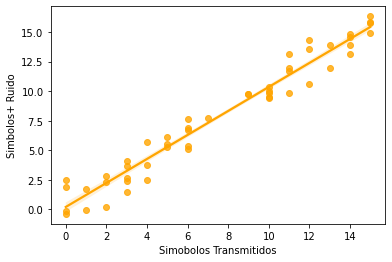

In [6]:
grafico = sns.regplot(var1, var2, ci=80, color='orange')
plt.ylabel('Simbolos+ Ruido')
plt.xlabel('Simobolos Transmitidos')

Para descartar los datos atipicos, hacemos uso del intervalo de confianza y sus limites inferior y superior. De manera que generamos primero una tupla.

In [9]:
tuple = list(zip(var1,var2))
tuple

[(0, -0.1456698069984574),
 (0, -0.3771329555051945),
 (11, 11.996321074238812),
 (13, 13.916701483417317),
 (1, 1.7555049213097713),
 (14, 13.93299824286406),
 (4, 5.678476079241438),
 (6, 5.142650460181629),
 (5, 6.113576665837981),
 (6, 7.690300314373186),
 (6, 6.700889068773923),
 (13, 11.931659486908297),
 (5, 5.245696095626683),
 (2, 2.3130487132744553),
 (15, 15.805133737632893),
 (10, 9.868987466034415),
 (7, 7.71330326142054),
 (15, 15.890510004995921),
 (4, 2.470553927140957),
 (14, 13.16253182299804),
 (3, 2.367504893953773),
 (12, 14.296217401401156),
 (11, 11.686083974349785),
 (10, 9.504837505089347),
 (10, 9.46542320334552),
 (6, 5.370422723130872),
 (4, 3.724415374982226),
 (11, 13.109749444970916),
 (15, 14.942478793198184),
 (1, -0.0038498289784922868),
 (5, 5.576494273838916),
 (10, 10.0507138477255),
 (9, 9.799534203541032),
 (0, 2.5125483843977277),
 (14, 14.825569167438738),
 (11, 9.878985334267806),
 (6, 6.8968121720837825),
 (3, 3.650613860458893),
 (2, 0.237878

In [11]:
tabla = pd.DataFrame(tuple,columns=['Simbolos Transmitidos','Señal + Ruido'])
tabla.head()

,Simbolos Transmitidos,Señal + Ruido
0,0,-0.145670
1,0,-0.377133
2,11,11.996321
3,13,13.916701
4,1,1.755505


Hacemos uso de la libreria de scipy.stats con `st`, usando una distribuciones de variables continuas `t`, y por ultimo usamos el metodo `interval` para hallar el intervalo de confianza (confidence interval CV).

Si la cantidad de muestras es menor a 30, usamos:
```python
  st.t.interval(alpha, df, loc, scale)
```
Mientras que si la cantidad de muestras es mayor a 30 usaremos: 
```python
  st.norm.interval(alpha, loc, scale)
``` 



Como usaremos valores mayores a 50, entonces usaremos `st.norm.interval` en donde sus parametros a analizar seran:
- `alpha = 0.95`: Esto debido a que se quiere un IC con un indice del 95%.
- `loc = np.mean(tabla)`: Enviamos el parametro de la media para ue nos devuelva los limites de acuerdo a la caracteristica del conjunto de datos.
- `scale = st.sem(tabla)`: Error estándar de la media $SE = \frac{\sigma}{\sqrt{n}}$, esto nos indica que el error de muestreo disminuye cuando crece el numero de muestras.

In [32]:
# 95
st.norm.interval(alpha = 0.95, loc = np.mean(tabla), scale = st.sem(tabla))

(array([6.18648043, 6.45686902]), array([8.89351957, 9.26248125]))

## Reto - Calculo para otros niveles de significancia

### Para 68%

In [35]:
#68
st.norm.interval(alpha = 0.68, loc = np.mean(tabla), scale=st.sem(tabla))

(array([6.8532434 , 7.14791124]), array([8.2267566 , 8.57143903]))

$IC_{68\%}(6.85 ; 8.22) \ | \ Símbolos \ Transmitidos$

$IC_{68\%}(7.14 ; 8.57) \ | \ Símbolos + Ruido$

### Para 99.7 %

In [38]:
#99.7
st.norm.interval(alpha = 0.997, loc = np.mean(tabla), scale=st.sem(tabla))

(array([5.49052797, 5.73557441]), array([9.58947203, 9.98377586]))

$IC_{99.7\%}(5.49 ; 9.58) \ | \ Símbolos \ Transmitidos$

$IC_{99.7\%}(5.73 ; 9.98) \ | \ Símbolos + Ruido$